In [5]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [6]:
from IPython.display import SVG
from IPython.display import display
from graphviz import Source
from IPython.display import HTML
style = "<style>svg{width:0.1% !important;height:0.1% !important;</style>"
HTML( style )

import os
os.environ["PATH"] += os.pathsep + "C:\\Program Files (x86)\\graphviz2.38\\bin" + os.pathsep + "C:\\Program Files (x86)\\graphviz2.38"


In [54]:
titanic_data = pd.read_csv('titanic/train.csv')
titanic_data.head()
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [55]:
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Cabin', 'Ticket'], axis=1)
y = titanic_data.Survived

In [56]:
X.head()
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [57]:
X = pd.get_dummies(X) # избавление от строковых значений
X = X.fillna({'Age': X.Age.median()})
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [58]:
max_depth_values = range(1, 100)

In [59]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [60]:
scores_data = pd.DataFrame()

In [61]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)

    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)

    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score': [train_score],
                                    'test_score': [test_score]})

    scores_data = pd.concat([scores_data, temp_score_data])

In [62]:
scores_data.head()

,max_depth,train_score,test_score
0,1,0.781879,0.796610
0,2,0.805369,0.776271
0,3,0.823826,0.820339
0,4,0.833893,0.823729
0,5,0.840604,0.806780


In [63]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score'],
                var_name='set_type', value_name='score')

In [64]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


<AxesSubplot: xlabel='max_depth', ylabel='score'>

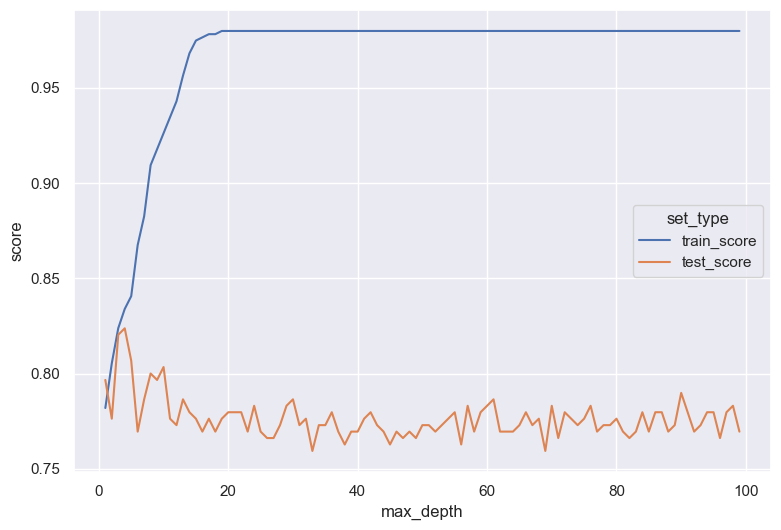

In [65]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

In [66]:
from sklearn.model_selection import cross_val_score

In [20]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [21]:
cross_val_score(clf, X_train, y_train, cv=5).mean()

0.7886274509803922

In [22]:
scores_data = pd.DataFrame()

for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)

    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)

    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()

    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score': [train_score],
                                    'test_score': [test_score],
                                    'cross_val_score': [mean_cross_val_score]})

    scores_data = pd.concat([scores_data, temp_score_data])

In [23]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score', 'cross_val_score'],
                var_name='set_type', value_name='score')

In [24]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


<AxesSubplot: xlabel='max_depth', ylabel='score'>

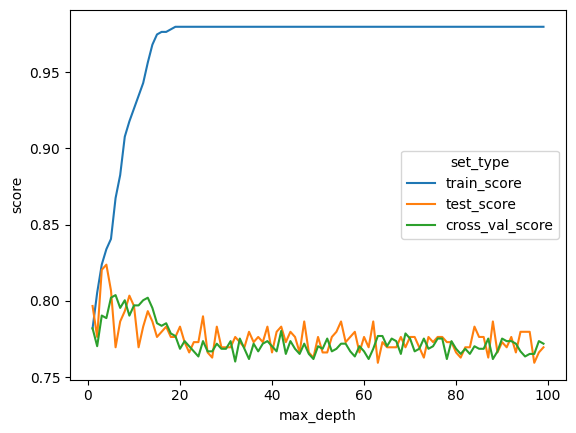

In [25]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

In [26]:
scores_data_long.query('set_type == "cross_val_score"').head(20)

,max_depth,set_type,score
198,1,cross_val_score,0.781961
199,2,cross_val_score,0.770196
200,3,cross_val_score,0.790322
201,4,cross_val_score,0.788627
202,5,cross_val_score,0.802073
203,6,cross_val_score,0.803754
204,7,cross_val_score,0.795336
205,8,cross_val_score,0.800364
206,9,cross_val_score,0.790266
207,10,cross_val_score,0.796989


In [27]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [28]:
cross_val_score(clf, X_test, y_test, cv=5).mean()

0.7898305084745763

In [73]:
from sklearn.model_selection import GridSearchCV

In [74]:
parametrs={'criterion':['gini', 'entropy'], 'max_depth': range(1, 30)}
clf=tree.DecisionTreeClassifier()

In [75]:
grid_search_cv_clf=GridSearchCV(clf, parametrs, cv=5)

In [76]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [77]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 7}

In [78]:
best_clf = grid_search_cv_clf.best_estimator_

In [79]:
best_clf.score(X_test, y_test)

0.7864406779661017

In [80]:
from sklearn.metrics import precision_score, recall_score

In [81]:
y_pred = best_clf.predict(X_test)

In [82]:
precision_score(y_test, y_pred)

0.8131868131868132

In [83]:
recall_score(y_test, y_pred)

0.6166666666666667

In [84]:
y_predicted_prob = best_clf.predict_proba(X_test)

<AxesSubplot: >

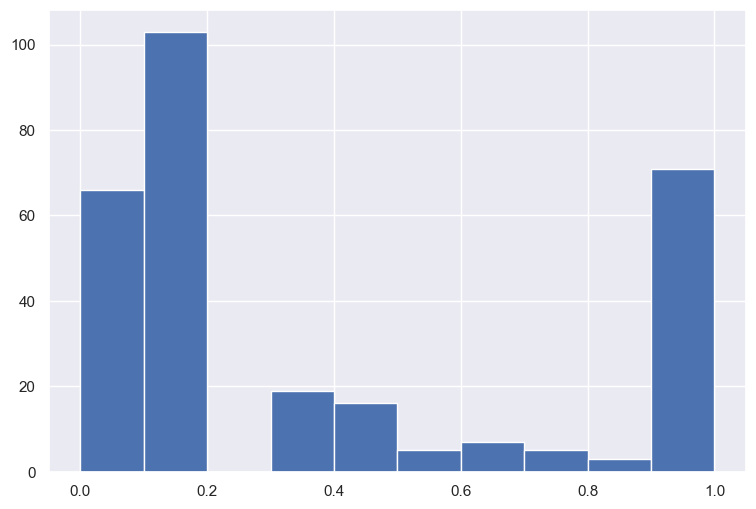

In [86]:
pd.Series(y_predicted_prob[:,1]).hist()

In [87]:
import numpy as np

In [97]:
y_pred = np.where(y_predicted_prob[:,1] > 0.8, 1, 0)
print(precision_score(y_test, y_pred), recall_score(y_test, y_pred))

0.875 0.525


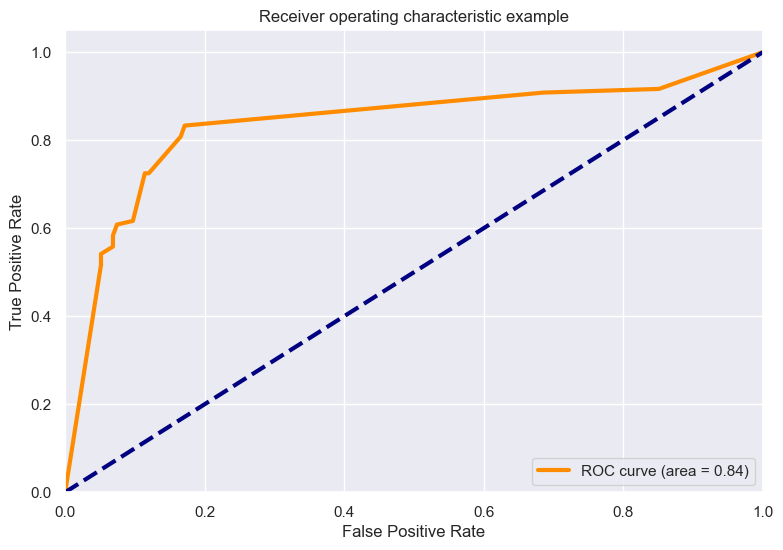

In [98]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=3, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()